# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 딥러닝 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray(n-dimensional array)와 유사

- GPU를 사용한 연산 가속도 가능

In [16]:
## pyplot작동시킬때, numpy와 다른 library간의 충돌로 인해 kernel dead  >> 해결방법
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [17]:
import torch

In [18]:
torch.__version__

'1.10.0+cu113'

### 초기화 되지 않은 행렬 

In [19]:
x = torch.empty(4, 2)
print(x) 

tensor([[4.2096e+21, 1.7014e-04],
        [1.7681e-04, 3.3977e+21],
        [4.3914e-05, 2.1159e+23],
        [1.0478e+21, 6.6817e+22]])


### 무작위로 초기화된 행렬

In [20]:
x = torch.rand(4, 2)
print(x)

tensor([[0.4943, 0.5381],
        [0.6805, 0.6299],
        [0.4529, 0.5354],
        [0.8725, 0.1413]])


### dtype이 long, 0으로 채워진 텐서

In [21]:
x = torch.zeros(4, 2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [22]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [23]:
x = x.new_ones(2, 4, dtype = torch.double)
print(x)

## torch.double >> 'float64'

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [24]:
x = torch.randn_like(x, dtype = torch.float)
print(x)

## 모양은 그대로 가져오되 랜덤으로 값을 채움

tensor([[ 0.1001,  0.8980,  2.1432, -0.4820],
        [ 1.5861,  0.8017,  1.0558, -0.0939]])


### 텐서의 크기

In [25]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [26]:
print(x)

tensor([[ 0.1001,  0.8980,  2.1432, -0.4820],
        [ 1.5861,  0.8017,  1.0558, -0.0939]])


In [27]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.9576, 0.6982, 0.1943, 0.1381],
        [0.7844, 0.0186, 0.5908, 0.1668]])
tensor([[ 1.0578,  1.5962,  2.3375, -0.3439],
        [ 2.3705,  0.8204,  1.6467,  0.0729]])


### 덧셈2

In [28]:
print(torch.add(x, y))

tensor([[ 1.0578,  1.5962,  2.3375, -0.3439],
        [ 2.3705,  0.8204,  1.6467,  0.0729]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [29]:
result = torch.empty(2, 4)
torch.add(x, y, out = result)
print(result)

## x + y 값을 'result'값으로 재지정

tensor([[ 1.0578,  1.5962,  2.3375, -0.3439],
        [ 2.3705,  0.8204,  1.6467,  0.0729]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 `_`가 붙음
  - `x.copy_(y), x.t_()`

In [30]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[ 0.1001,  0.8980,  2.1432, -0.4820],
        [ 1.5861,  0.8017,  1.0558, -0.0939]])
tensor([[0.9576, 0.6982, 0.1943, 0.1381],
        [0.7844, 0.0186, 0.5908, 0.1668]])
tensor([[ 1.0578,  1.5962,  2.3375, -0.3439],
        [ 2.3705,  0.8204,  1.6467,  0.0729]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [31]:
x = torch.Tensor([[1, 3],
                 [5, 7]])
y = torch.Tensor([[2, 4],
                 [6, 8]])
print(x - y)
print(torch.add(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[ 3.,  7.],
        [11., 15.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [32]:
x = torch.Tensor([[1, 3],
                 [5, 7]])
y = torch.Tensor([[2, 4],
                 [6, 8]])
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [33]:
x = torch.Tensor([[1, 3],
                 [5, 7]])
y = torch.Tensor([[2, 4],
                 [6, 8]])
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [34]:
x = torch.Tensor([[1, 3],
                 [5, 7]])
y = torch.Tensor([[2, 4],
                 [6, 8]])
print(torch.mm(x, y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [35]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [36]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [37]:
x = torch.randn(4, 5)
y = x.view(20)          ## 2차원의 나열된 형태로 출력
z = x.view(5, -1)

print(x)
print(y)
print(z)
print(x.size())
print(y.size())
print(z.size())

tensor([[-0.2814,  0.2022,  0.7245,  0.0413,  0.4364],
        [ 0.9192,  0.3434,  0.1283,  0.3950, -1.5086],
        [ 0.9524,  0.3096, -1.7042, -0.7953, -0.1718],
        [ 0.3156, -0.5016,  1.7356,  0.4141, -0.1735]])
tensor([-0.2814,  0.2022,  0.7245,  0.0413,  0.4364,  0.9192,  0.3434,  0.1283,
         0.3950, -1.5086,  0.9524,  0.3096, -1.7042, -0.7953, -0.1718,  0.3156,
        -0.5016,  1.7356,  0.4141, -0.1735])
tensor([[-0.2814,  0.2022,  0.7245,  0.0413],
        [ 0.4364,  0.9192,  0.3434,  0.1283],
        [ 0.3950, -1.5086,  0.9524,  0.3096],
        [-1.7042, -0.7953, -0.1718,  0.3156],
        [-0.5016,  1.7356,  0.4141, -0.1735]])
torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [38]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-2.0491])
-2.0491230487823486
torch.float32


- 스칼라값 하나만 존재해야함

In [39]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

## only one element(하나의 스칼라값) tensors can be converted to Python scalars

tensor([0.2245, 0.2187])


ValueError: only one element tensors can be converted to Python scalars

### squeeze 
- 차원을 축소(제거)

In [40]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.9795, 0.7383, 0.9776],
         [0.0839, 0.5996, 0.8733],
         [0.4855, 0.6541, 0.1474]]])
torch.Size([1, 3, 3])


In [41]:
t = tensor.squeeze()

print(t)
print(t.shape)


tensor([[0.9795, 0.7383, 0.9776],
        [0.0839, 0.5996, 0.8733],
        [0.4855, 0.6541, 0.1474]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [42]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.1741, 0.0166, 0.7352],
         [0.9547, 0.1653, 0.5488],
         [0.7892, 0.8184, 0.7725]]])
torch.Size([1, 3, 3])


In [43]:
t = tensor.unsqueeze(dim = 0)

print(t)
print(t.shape)

## 차원 증가

tensor([[[[0.1741, 0.0166, 0.7352],
          [0.9547, 0.1653, 0.5488],
          [0.7892, 0.8184, 0.7725]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [44]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [45]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim = 0)

print(c)
print(c.size())

tensor([[[[ 0.4166,  0.3671,  0.7085],
          [ 0.6062,  0.9117, -0.2106],
          [ 0.3414,  0.6985, -1.8718]]],


        [[[ 0.1468,  0.2400,  1.5139],
          [ 1.6328, -1.1077,  0.2759],
          [ 1.9069, -2.1659,  0.3127]]]])
torch.Size([2, 1, 3, 3])


In [46]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim = 0)

print(c)
print(c.size())

tensor([[[ 0.1962,  0.3278, -0.3633],
         [-0.5938,  0.4754,  0.9162],
         [ 1.3915,  0.2711, -0.0756]],

        [[ 1.9623, -0.4021, -0.2932],
         [ 0.4605, -0.1103, -0.7941],
         [ 0.1475, -0.9303,  0.4100]]])
torch.Size([2, 3, 3])


### chunk
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [47]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim = 1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.5760, 0.7573, 0.5791, 0.0176, 0.8226, 0.1254],
        [0.0252, 0.4969, 0.7748, 0.6832, 0.5498, 0.7874],
        [0.0186, 0.2991, 0.4934, 0.0149, 0.6415, 0.8415]])
tensor([[0.5760, 0.7573],
        [0.0252, 0.4969],
        [0.0186, 0.2991]])
tensor([[0.5791, 0.0176],
        [0.7748, 0.6832],
        [0.4934, 0.0149]])
tensor([[0.8226, 0.1254],
        [0.5498, 0.7874],
        [0.6415, 0.8415]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [48]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim = 1)

print(tensor)
print(t1)
print(t2)

tensor([[0.8571, 0.3952, 0.8019, 0.7675, 0.9973, 0.2931],
        [0.5550, 0.7205, 0.3169, 0.3514, 0.9497, 0.7164],
        [0.8857, 0.4581, 0.0240, 0.1501, 0.8134, 0.9480]])
tensor([[0.8571, 0.3952, 0.8019],
        [0.5550, 0.7205, 0.3169],
        [0.8857, 0.4581, 0.0240]])
tensor([[0.7675, 0.9973, 0.2931],
        [0.3514, 0.9497, 0.7164],
        [0.1501, 0.8134, 0.9480]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [49]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [50]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [51]:
a.add_(1)
print(a)
print(b)

## 메모리가 공유된 형태이기때문에 a에 적용해도 b에 적용됨

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [52]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out = a)

print(a)
print(b)

## 위와 반대의 형태도 적용됨

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [53]:
import torch

In [54]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.9434])
0.9434255957603455
torch.float32


In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device = device)  ## gpu
x = x.to(device)   ## gpu
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))  ## cpu

cuda
tensor([1.9434], device='cuda:0')
tensor([1.9434], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [56]:
import torch

In [57]:
x = torch.ones(3, 3, requires_grad = True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [58]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [59]:
print(y.grad_fn)

In [60]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [61]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [62]:
out.backward()

In [63]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [64]:
x = torch.randn(3, requires_grad = True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([-1204.0151,  -907.0632,   444.9935], grad_fn=<MulBackward0>)


In [65]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [66]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [67]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [68]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [69]:
a = torch.ones(2, 2, requires_grad = True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [70]:
print('a.data:', a)
print('a.grad:', a.grad)
print('a.grad_fn', a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn None


- $b = a + 2$

In [71]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [72]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [73]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [74]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [75]:
print('a.data:', a.data)
print('a.grad:', a.grad)
print('a.grad_fn', a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [76]:
print('b.data:', b.data)
print('b.grad:', b.grad)
print('b.grad_fn', b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn <AddBackward0 object at 0x00000187AA8D53A0>


C:\Users\User\anaconda3\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [77]:
print('c.data:', c.data)
print('c.grad:', c.grad)
print('c.grad_fn', c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn <PowBackward0 object at 0x00000187AA926D90>


In [78]:
print('out.data:', out.data)
print('out.grad:', out.grad)
print('out.grad_fn', out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn <SumBackward0 object at 0x00000187AA931DC0>


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [79]:
x = torch.ones(3, requires_grad = True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [80]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [81]:
print('x.data:', x.data)
print('x.grad:', x.grad)
print('x.grad_fn', x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn None


In [82]:
print('y.data:', y.data)
print('y.grad:', y.grad)
print('y.grad_fn', y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn <PowBackward0 object at 0x00000187AA9361C0>


In [83]:
print('z.data:', z.data)
print('z.grad:', z.grad)
print('yz.grad_fn', z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
yz.grad_fn <AddBackward0 object at 0x00000187AA936250>


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [84]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [85]:
m = nn.Conv2d(16, 33, 3, stride = 2)

m = nn.Conv2d(16, 33, (3, 5), stride = (2, 1), padding = (4, 2))   ## kenel_size = (3, 5) : non-square

m = nn.Conv2d(16, 33, (3, 5), stride = (2, 1), padding = (4, 2), dilation = (3, 1))   ## dilation : padding 사이의 간격

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)
print(output)

tensor([[[[-2.3786e-01, -2.0828e-01, -1.9869e+00,  ..., -2.0005e-01,
            7.6591e-01, -1.5691e-01],
          [-8.7377e-01, -3.7826e-01, -1.0437e+00,  ..., -6.3094e-01,
            1.7201e-01, -7.3196e-01],
          [ 4.5877e-01, -1.7217e+00, -2.8078e-01,  ..., -8.3087e-01,
           -6.8993e-01,  9.3212e-01],
          ...,
          [ 1.5956e-02, -4.2803e-01, -4.7430e-01,  ...,  1.4325e+00,
           -1.5158e+00,  7.2027e-01],
          [ 8.4602e-01,  3.3291e-01, -6.2889e-01,  ..., -1.4843e+00,
           -1.9154e+00,  1.3924e+00],
          [ 8.6444e-01,  8.7619e-02,  1.2312e+00,  ..., -2.5063e+00,
            1.0943e+00,  2.5202e+00]],

         [[ 6.5398e-01, -3.4213e-01,  2.2201e+00,  ..., -1.3937e+00,
           -2.1117e+00, -1.1607e+00],
          [-1.2032e+00, -2.0027e+00,  4.7699e-01,  ..., -1.1730e+00,
            9.2401e-01,  5.3912e-01],
          [ 4.3737e-01, -3.6971e-01,  7.1331e-01,  ..., -1.7110e+00,
            3.6971e-02,  4.6006e-01],
          ...,
     

tensor([[[[-1.1300e-01,  1.0294e-01,  1.3920e-01,  ..., -3.9203e-01,
           -4.1853e-01, -2.1862e-01],
          [ 3.0238e-01,  2.1911e-01,  6.2230e-01,  ..., -3.1405e-01,
           -1.2207e-01,  1.9397e-01],
          [ 9.5156e-03, -3.8568e-01, -1.8987e-01,  ..., -6.6378e-01,
            2.5005e-01, -6.0237e-01],
          ...,
          [ 8.8634e-01, -6.5058e-01,  3.0802e-01,  ...,  6.4602e-01,
            1.1345e+00, -3.4880e-01],
          [-6.6648e-01,  4.8086e-01, -1.3450e-02,  ..., -5.8739e-03,
           -3.0345e-01,  2.8528e-01],
          [ 5.8539e-01, -5.8927e-01, -1.6820e-01,  ...,  6.3092e-01,
           -3.4842e-01,  2.9549e-02]],

         [[ 1.8039e-01,  6.4481e-01,  1.4967e-01,  ..., -5.3485e-01,
           -4.1123e-01, -3.5729e-01],
          [ 1.8308e-01,  3.2019e-02,  2.5438e-01,  ..., -4.1272e-01,
           -7.8204e-01,  2.9791e-01],
          [-6.7459e-02,  4.3200e-01, -6.6819e-01,  ...,  5.1951e-01,
            2.3725e-01,  4.1935e-01],
          ...,
     

In [86]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [87]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [88]:
filters = torch.randn(8, 4, 3, 3)

In [89]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding = 1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 **전처리 단계**를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [90]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [91]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(mean = (0.5, ), std = (0.5, ))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [92]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [93]:
trainset = torchvision.datasets.MNIST(root = '',
                                    train = True,
                                    download = True,
                                    transform = transform)

testset = torchvision.datasets.MNIST(root = '',
                                    train = False,
                                    download = True,
                                    transform = transform)

In [94]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [95]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

## ([8, 1, 28, 28]) : batch_size만큼 8 / gray_scale로 가져왔기때문에 1, 28, 28

## tensorflow에선 28, 28, 1  / but, pytorch에선  1, 28, 28  // 채널이 앞에옴

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [96]:
import matplotlib.pyplot as plt

In [97]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [98]:
image = torch_image.numpy()
image.shape

(28, 28)

In [99]:
label = labels[0].numpy()
label.shape

()

In [100]:
label

array(7, dtype=int64)

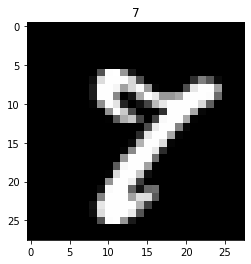

In [101]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [103]:
nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [104]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [105]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [106]:
weight = weight.detach()

In [107]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

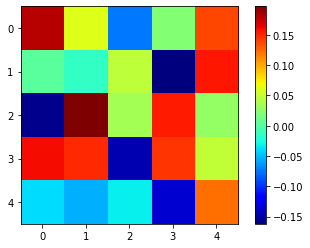

In [108]:
import matplotlib.pyplot as plt

plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()

plt.show()

In [111]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [112]:
## 차원 늘리기
input_image = torch.unsqueeze(images[0], dim = 0)

In [113]:
output_data = layer(input_image)

In [114]:
output = output_data.data

In [115]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

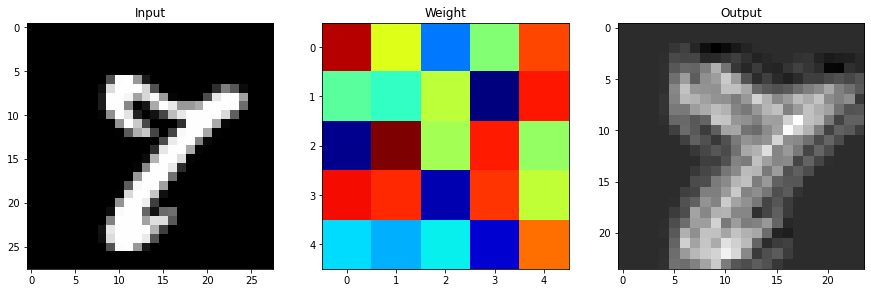

In [117]:
plt.figure(figsize = (15, 30))

# 입력
plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')

# weight 값
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')

# weight 값을 거친 output값 출력
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')

plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [118]:
image.shape

(28, 28)

In [119]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [120]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

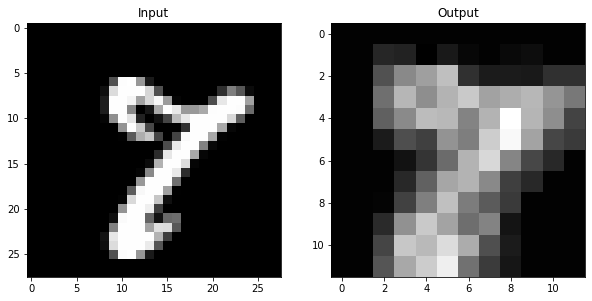

In [121]:
plt.figure(figsize = (10, 15))

# Input
plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')

# MaxPooling을 거친 값 >> Output
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [122]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [123]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [124]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [125]:
lin

tensor([[-0.4279,  0.0459,  0.0264,  0.1358,  0.9872, -0.2606, -0.4386, -0.6091,
         -0.6971, -0.5999]], grad_fn=<AddmmBackward0>)

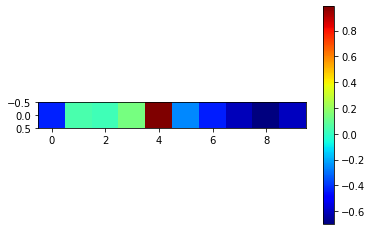

In [126]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [127]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim = 1)

In [128]:
softmax

tensor([[0.1254, 0.1065, 0.0694, 0.1411, 0.0876, 0.0516, 0.0620, 0.0953, 0.1465,
         0.1147]])

In [129]:
np.sum(softmax.numpy())

0.99999994

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [130]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [131]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

